In [1]:
from sqlalchemy import create_engine
import sqlalchemy
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


# Ruta del archivo CSV
file_path = "madrid_dataset.csv"

# Leer el archivo CSV
df = pd.read_csv(file_path)
df.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,94815.000000,9.481500e+04,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,...,94815.000000,94814.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,201808.613289,3.961101e+05,3661.051534,101.397163,2.580900,1.585456,0.355260,0.695597,0.448600,0.225102,...,39.187164,4.852184,0.030396,0.186563,0.783041,4.486269,0.480916,2.679227,-3.686408,40.421083
std,3.684625,4.170744e+05,1700.499398,67.078259,1.244878,0.843024,0.478595,0.460157,0.497354,0.417651,...,54.254387,1.462988,0.171675,0.389563,0.412177,2.994906,1.433584,2.581346,0.039239,0.035495
min,201803.000000,2.100000e+04,805.309734,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.833611,36.756391
25%,201806.000000,1.600000e+05,2240.000000,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,4.000000,0.000000,0.000000,1.000000,2.407711,0.213458,1.035143,-3.708474,40.396868
50%,201809.000000,2.620000e+05,3480.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,21.000000,5.000000,0.000000,0.000000,1.000000,4.123505,0.331882,1.956978,-3.694104,40.423295
75%,201812.000000,4.670000e+05,4744.623034,117.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,40.000000,6.000000,0.000000,0.000000,1.000000,6.213463,0.523025,3.840641,-3.666227,40.441998
max,201812.000000,8.133000e+06,9997.560976,985.000000,93.000000,20.000000,1.000000,1.000000,1.000000,1.000000,...,1499.000000,9.000000,1.000000,1.000000,1.000000,415.752584,399.477367,412.803688,-2.753303,40.520637


In [3]:

# Conexión a la base de datos
user = "root"
password = "PythonMySQL"
db = "idealista"
sqlServer = "localhost"

# Crear el string de conexión
connStr = f"mysql+mysqlconnector://{user}:{password}@{sqlServer}/{db}"

# Crear el motor de conexión
engine = create_engine(connStr)

# Guardar el DataFrame en una tabla llamada "madrid_dataset" dentro de la base de datos
df.to_sql('madrid_dataset', con=engine, if_exists='replace', index=False)

print("Datos cargados en MySQL con éxito.")

Datos cargados en MySQL con éxito.


1^
Muestra las columnas ASSETID, PRICE y CONSTRUCTEDAREA de todas las propiedades del dataset.

In [4]:
# Consulta sql
query = """

SELECT ASSETID, PRICE, CONSTRUCTEDAREA 
FROM madrid_dataset;

"""

# Ejecutar la consulta y cargar los resultados en un DataFrame de Pandas
result_df = pd.read_sql(query, con=engine)

# Mostrar los resultados
result_df

,ASSETID,PRICE,CONSTRUCTEDAREA
0,A15019136831406238029,126000.0,47
1,A6677225905472065344,235000.0,54
2,A13341979748618524775,373000.0,75
3,A4775182175615276542,284000.0,48
4,A2492087730711701973,228000.0,50
...,...,...,...
94810,A3962186799478940177,347000.0,115
94811,A3876164367053781729,311000.0,93
94812,A17768295786772492698,342000.0,121
94813,A15733144649359668635,146000.0,62


2^
¿Qué meses están informados en el dataset?

In [5]:
# Consulta SQL de ejemplo
query = """
SELECT PERIOD, COUNT(*) AS property_count 
FROM madrid_dataset
GROUP BY PERIOD;

"""
result_df = pd.read_sql(query, con=engine)
result_df

,PERIOD,property_count
0,201803,21920
1,201809,15973
2,201812,44270
3,201806,12652


3^
¿Cuáles son las propiedades con precio mayor a 500.000€? Muestra solo las columnas mencionadas en la pregunta anterior.

In [6]:
query = """
SELECT PERIOD, ASSETID, PRICE, CONSTRUCTEDAREA 
FROM madrid_dataset
WHERE PRICE > 500000;

"""
result_df = pd.read_sql(query, con=engine)
result_df

,PERIOD,ASSETID,PRICE,CONSTRUCTEDAREA
0,201803,A3694300518337702967,3187000.0,360
1,201803,A2893199643597593313,1013000.0,155
2,201803,A2841754568502209063,897000.0,142
3,201803,A10976273205185897585,2349000.0,542
4,201803,A7303974074369981066,650000.0,156
...,...,...,...,...
21416,201809,A2896684038635041673,536000.0,135
21417,201806,A1614593532336228346,611000.0,135
21418,201812,A29125659981330982,585000.0,125
21419,201803,A2551241941830732483,2500000.0,370


4^
Muestra el ASSETID, PRICE y DISTANCE_TO_CITY_CENTER de las propiedades, ordenadas por la distancia al centro de Madrid, de menor a mayor.

In [7]:
query = """
SELECT ASSETID, PRICE, DISTANCE_TO_CITY_CENTER 
FROM madrid_dataset
ORDER BY DISTANCE_TO_CITY_CENTER ASC;

"""


result_df = pd.read_sql(query, con=engine)
result_df

,ASSETID,PRICE,DISTANCE_TO_CITY_CENTER
0,A14463748717931350558,313000.0,0.007647
1,A14463748717931350558,318000.0,0.015374
2,A14790941167625244279,184000.0,0.017035
3,A16592249939696567334,580000.0,0.019950
4,A7779440507525276986,88000.0,0.025417
...,...,...,...
94810,A1297240254286505813,125000.0,14.149930
94811,A4643559363893042435,197000.0,14.157760
94812,A17772541152145799139,91000.0,14.157997
94813,A17051760191187174953,105000.0,14.158814


5^
Selecciona todas las propiedades que tengan más de 3 habitaciones y un precio mayor a 300000€. Muestra el ASSETID, ROOMNUMBER y PRICE.

In [8]:
query = """
SELECT ASSETID, ROOMNUMBER, PRICE 
FROM madrid_dataset
WHERE ROOMNUMBER > 3 AND PRICE > 300000;

"""

result_df = pd.read_sql(query, con=engine)
result_df

,ASSETID,ROOMNUMBER,PRICE
0,A3694300518337702967,4,3187000.0
1,A2841754568502209063,5,897000.0
2,A7303974074369981066,6,650000.0
3,A17297754155641241826,5,1131000.0
4,A11062411078831478929,11,2606000.0
...,...,...,...
13966,A14049093328387781715,4,386000.0
13967,A13424841814786512814,4,403000.0
13968,A2551241941830732483,5,2500000.0
13969,A3107360537414270361,4,936000.0


6^
¿Cuáles son las propiedades que tienen al menos 2 baños, un ascensor y una plaza de aparcamiento? Selecciona el ASSETID, BATHNUMBER, HASLIFT, HASPARKINGSPACE y PRICE.

In [9]:
query = """
SELECT ASSETID, BATHNUMBER, HASLIFT, HASPARKINGSPACE, PRICE 
FROM madrid_dataset
WHERE BATHNUMBER >= 2 AND HASLIFT = 1 AND HASPARKINGSPACE = 1;

"""

result_df = pd.read_sql(query, con=engine)
result_df

,ASSETID,BATHNUMBER,HASLIFT,HASPARKINGSPACE,PRICE
0,A3694300518337702967,3,1,1,3187000.0
1,A17297754155641241826,3,1,1,1131000.0
2,A4444264986115631121,2,1,1,943000.0
3,A3581405731630543117,6,1,1,1939000.0
4,A6349776121498293972,2,1,1,369000.0
...,...,...,...,...,...
15994,A7034851435465452892,2,1,1,229000.0
15995,A10324853219120899544,2,1,1,293000.0
15996,A3962186799478940177,2,1,1,347000.0
15997,A3876164367053781729,2,1,1,311000.0


7^
¿Cuál es el precio promedio de las propiedades con terraza?

In [10]:
query = """
SELECT AVG(PRICE) AS avg_price 
FROM madrid_dataset
WHERE HASTERRACE = 1;

"""

result_df = pd.read_sql(query, con=engine)
result_df

,avg_price
0,432226.665479


8^
¿Cuántas propiedades hay según el número de habitaciones? ¿Cuál es el precio medio de los apartamentos según el número de habitaciones?

In [11]:
query = """
SELECT ROOMNUMBER, COUNT(*) AS property_count, AVG(PRICE) AS avg_price 
FROM madrid_dataset
GROUP BY ROOMNUMBER;

"""

result_df = pd.read_sql(query, con=engine)
result_df

,ROOMNUMBER,property_count,avg_price
0,1,13338,2.402881e+05
1,2,28422,2.847405e+05
2,0,2745,2.211089e+05
3,3,33961,3.492892e+05
4,4,11674,6.932969e+05
5,5,3350,1.114953e+06
6,6,789,1.431944e+06
7,11,16,1.799938e+06
8,7,279,1.442634e+06
9,8,142,1.591268e+06


9^
¿Cuáles son las propiedades cuyo precio es mayor que el precio promedio 
de todas las propiedades en el dataset? Muestra el ASSETID, PRICE y 
CONSTRUCTEDAREA.


In [12]:
query = """
SELECT ASSETID, PRICE, CONSTRUCTEDAREA 
FROM madrid_dataset
WHERE PRICE > (SELECT AVG(PRICE) FROM madrid_dataset);

"""
result_df = pd.read_sql(query, con=engine)
result_df

,ASSETID,PRICE,CONSTRUCTEDAREA
0,A18372428154681111419,498000.0,127
1,A9587449507628658013,425000.0,70
2,A3694300518337702967,3187000.0,360
3,A11532129615377606790,422000.0,114
4,A2893199643597593313,1013000.0,155
...,...,...,...
29694,A3107360537414270361,936000.0,205
29695,A10395827789147723674,460000.0,115
29696,A12819204236902632452,460000.0,93
29697,A13569164165299053978,457000.0,93


10^
¿Cuáles son las propiedades que están a menos de 2 kilómetros de Castellana? Selecciona el ASSETID, PRICE y DISTANCE_TO_CASTELLANA.

In [13]:
query = """
SELECT ASSETID, PRICE, DISTANCE_TO_CASTELLANA
FROM madrid_dataset
WHERE DISTANCE_TO_CASTELLANA < 2;

"""

result_df = pd.read_sql(query, con=engine)
result_df

,ASSETID,PRICE,DISTANCE_TO_CASTELLANA
0,A6677225905472065344,235000.0,1.544125
1,A13341979748618524775,373000.0,1.608444
2,A4775182175615276542,284000.0,1.516166
3,A2492087730711701973,228000.0,1.794136
4,A18372428154681111419,498000.0,1.168126
...,...,...,...
48202,A13424841814786512814,403000.0,0.676853
48203,A9922654306483106337,128000.0,1.490777
48204,A1253305118080971310,230000.0,1.623517
48205,A1665144886175919280,211000.0,1.304576


Gráfico para Visualizar la Distribución de Propiedades por Número de Habitaciones

Podemos usar un gráfico de barras para visualizar qué tipo de propiedades predominan según el número de habitaciones:

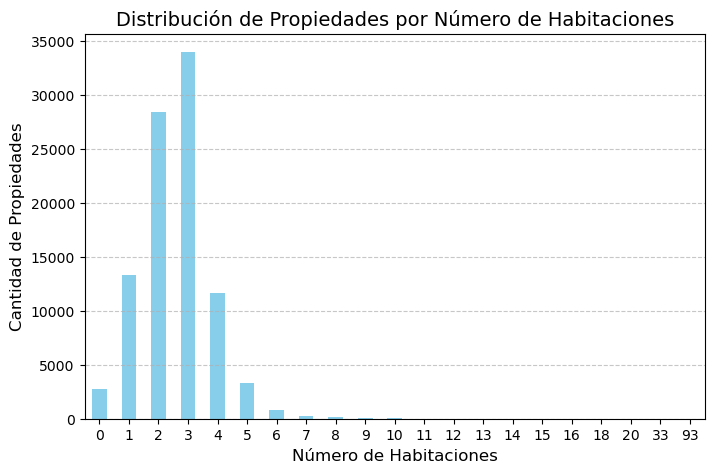

In [14]:

import matplotlib.pyplot as plt

# Carga del dataset
df = pd.read_csv("madrid_dataset.csv")

# Agrupamos por número de habitaciones y contamos las propiedades
room_distribution = df.groupby("ROOMNUMBER")["ASSETID"].count()

# Graficamos
plt.figure(figsize=(8, 5))
room_distribution.plot(kind="bar", color="skyblue")
plt.title("Distribución de Propiedades por Número de Habitaciones", fontsize=14)
plt.xlabel("Número de Habitaciones", fontsize=12)
plt.ylabel("Cantidad de Propiedades", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Explicación del Gráfico

El gráfico de barras muestra cuántas propiedades hay según el número de habitaciones:
	•	2-3 habitaciones: Predominan, indicando una preferencia por propiedades prácticas y familiares.
	•	Propiedades grandes (4+ habitaciones): Son menos frecuentes, reflejando una menor demanda en comparación con viviendas más pequeñas.

Datos Relevantes para el Trabajo Práctico

	1.	Ubicación: La cercanía al centro (menos de 2 km de Castellana) es crucial para precios altos.
	2.	Tamaño: Viviendas con 2-3 habitaciones dominan el mercado.
	3.	Comodidades: Terrazas, ascensores y aparcamientos son características altamente deseadas.
	4.	Estrategias: Promocionar propiedades familiares accesibles con buenas conexiones al centro.

Este análisis puede servir para desarrollar estrategias comerciales sólidas y entender las necesidades del mercado inmobiliario en Madrid.

### 11. Propiedades dúplex con más de 100 m²

In [15]:
query = """
SELECT ASSETID, PRICE, CONSTRUCTEDAREA, ROOMNUMBER
FROM madrid_dataset
WHERE ISDUPLEX = 1 AND CONSTRUCTEDAREA > 100;

"""
result_df = pd.read_sql(query, con=engine)
result_df

,ASSETID,PRICE,CONSTRUCTEDAREA,ROOMNUMBER
0,A5073667996603810448,1221000.0,189,2
1,A17722368545623643717,507000.0,158,3
2,A17661055479884976233,649000.0,220,4
3,A4671190715338907020,949000.0,161,3
4,A5772163214285070190,729000.0,150,3
...,...,...,...,...
1379,A11695862639235936179,560000.0,145,3
1380,A1939687655907737170,216000.0,160,4
1381,A1614593532336228346,611000.0,135,3
1382,A10172299496973656620,388000.0,275,5


In [16]:
12

query = """
SELECT PERIOD, AVG(PRICE) AS AvgPrice, MAX(PRICE) AS MaxPrice, MIN(PRICE) AS MinPrice FROM madrid_dataset WHERE PERIOD LIKE '2018%' GROUP BY PERIOD ORDER BY PERIOD;


"""
result_df = pd.read_sql(query, con=engine)
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


In [17]:
13

# Operación UPDATE dentro de un contexto
select_query = """
UPDATE madrid_dataset 
SET PRICE = PRICE * 1.05 
WHERE HASAIRCONDITIONING = 1;
"""

with engine.connect() as connection:
    result = connection.execute(select_query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


14. Elimine todas las propiedades que tengan menos de 30 metros cuadrados de superficie construida.

In [18]:
14

# Operación UPDATE dentro de un contexto
query = """
DELETE FROM madrid_dataset 
WHERE CONSTRUCTEDAREA < 30;
"""

with engine.connect() as connection:
    result = connection.execute(select_query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


15. Crea una vista que muestre solo las propiedades con terraza y piscina, incluyendo los campos ASSETID, PRICE, ROOMNUMBER y BATHNUMBER.

In [19]:
# Operación UPDATE dentro de un contexto
query = """
result_dfCREATE VIEW Vista_Terraza_Piscina AS 
SELECT ASSETID, PRICE, ROOMNUMBER, BATHNUMBER 
FROM madrid_dataset 
WHERE HASTERRACE = 1 AND HASSWIMMINGPOOL = 1;
"""

with engine.connect() as connection:
    result = connection.execute(select_query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


16.Calcula el precio promedio de las propiedades nuevas y de las de segunda mano en buen estado, y muestra ambos precios.

In [20]:

query = """
SELECT 
    AVG(CASE WHEN BUILTTYPEID_1 = 1 THEN PRICE END) AS AvgPriceNew,
    AVG(CASE WHEN BUILTTYPEID_3 = 1 THEN PRICE END) AS AvgPriceSecondHandGood
FROM madrid_dataset;
"""

with engine.connect() as connection:
    result = connection.execute(select_query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


17. Calcula el número total de propiedades que tienen terraza y piscina, y cuántas de ellas también tienen ascensor.

In [21]:
query = """
SELECT 
    COUNT(*) AS TotalWithTerraceAndPool,
    SUM(CASE WHEN HASLIFT = 1 THEN 1 ELSE 0 END) AS WithLift
FROM madrid_dataset
WHERE HASTERRACE = 1 AND HASSWIMMINGPOOL = 1;
"""

with engine.connect() as connection:
    result = connection.execute(select_query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


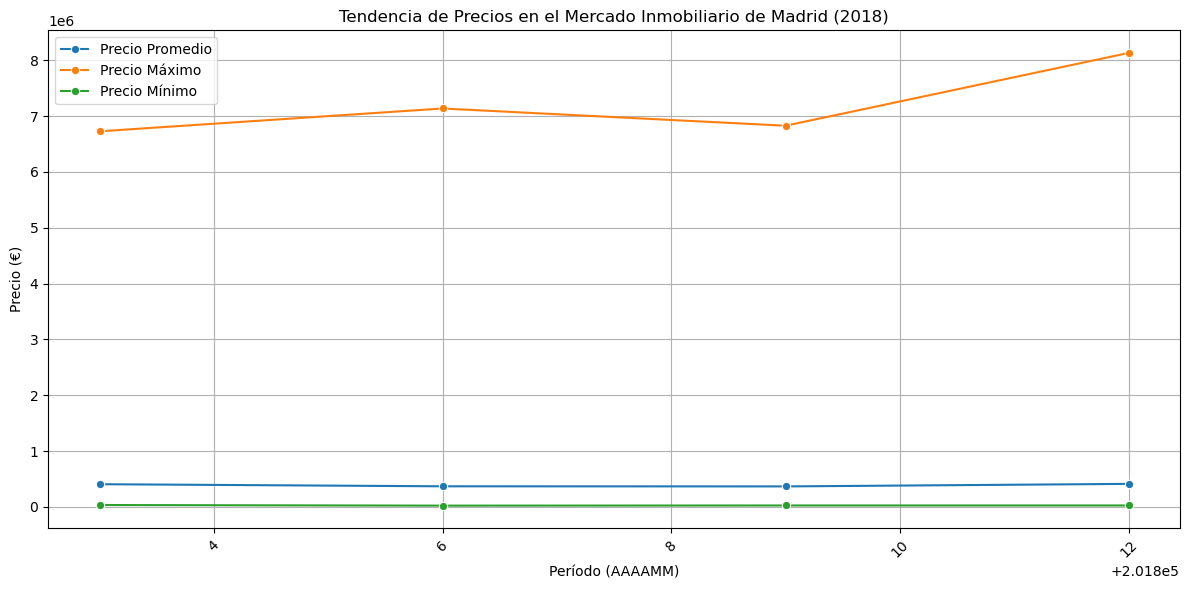

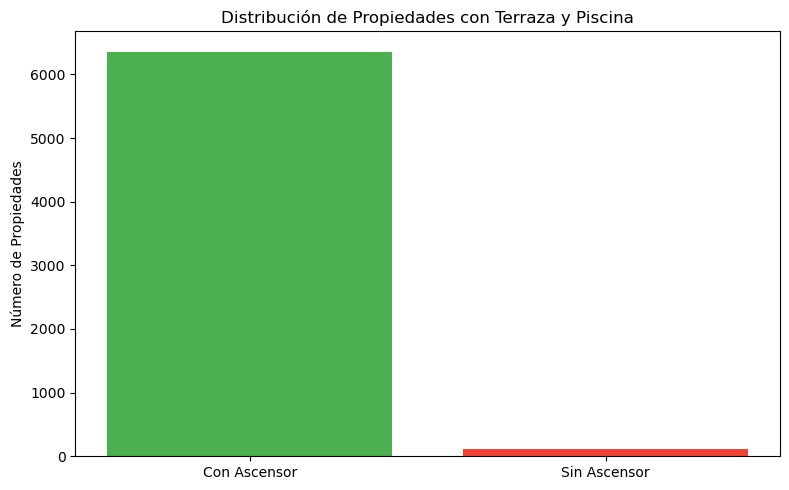

In [22]:

# Gráfico 1: Tendencia de precios promedio, máximo y mínimo por mes
monthly_prices = df.groupby('PERIOD').agg({
    'PRICE': ['mean', 'max', 'min']
}).reset_index()
monthly_prices.columns = ['PERIOD', 'AvgPrice', 'MaxPrice', 'MinPrice']

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_prices, x='PERIOD', y='AvgPrice', label='Precio Promedio', marker='o')
sns.lineplot(data=monthly_prices, x='PERIOD', y='MaxPrice', label='Precio Máximo', marker='o')
sns.lineplot(data=monthly_prices, x='PERIOD', y='MinPrice', label='Precio Mínimo', marker='o')
plt.title('Tendencia de Precios en el Mercado Inmobiliario de Madrid (2018)')
plt.xlabel('Período (AAAAMM)')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de propiedades con terraza y piscina
terrace_and_pool_count = df[(df['HASTERRACE'] == 1) & (df['HASSWIMMINGPOOL'] == 1)]

# Contar cuántas tienen ascensor
total_with_lift = terrace_and_pool_count['HASLIFT'].sum()
total_without_lift = len(terrace_and_pool_count) - total_with_lift

labels = ['Con Ascensor', 'Sin Ascensor']
sizes = [total_with_lift, total_without_lift]

plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=['#4CAF50', '#F44336'])
plt.title('Distribución de Propiedades con Terraza y Piscina')
plt.ylabel('Número de Propiedades')
plt.tight_layout()
plt.show()

Análisis de los gráficos -->
Gráfico de Tendencia de Precios :

Este gráfico te permitirá observar cómo han fluctuado los precios promedio, máximo y mínimo a lo largo de los meses de 2018. Podría destacar periodos de aumento o disminución en los precios, lo que es útil para entender el mercado.
Distribución de Propiedades con Terraza y Piscina :

Este gráfico de barras proporcionará una representación clara de cuántas propiedades con terraza y piscina también cuentan con ascensor. Este tipo de gráfico es útil para visualizar la proporción de propiedades que ofrecen características adicionales, lo que puede influir en las decisiones de compra.

###Parte dos

In [28]:
sSQL = """
ALTER TABLE madrid_dataset
ADD COLUMN AGENCY_ID INT;

"""
conn = create_engine(connStr).connect()
conn.execute(sSQL)

<!-- 1 Muestra las columnas ASSETID, PRICE y CONSTRUCTEDAREA de todas las propiedades del dataset. -->

In [29]:
# Creamos una tabla con información de trabajadores, llamandola plantilla
sSQL = """
   CREATE TABLE agencias3 (
    AGENCY_ID INT PRIMARY KEY,
    AGENCY_NAME VARCHAR(100),
    RATING DECIMAL(2,1) CHECK (RATING >= 1 AND RATING <= 5)  -- Asegura que el rating esté entre 1 y 5
);

"""
conn = create_engine(connStr).connect()
conn.execute(sSQL)

In [30]:
sSQL = """
   INSERT INTO agencias3 (AGENCY_ID, AGENCY_NAME, RATING) VALUES
(1, 'Agencia Madrid Plus', 4.5),
(2, 'Madrid Viviendas', 4.2),
(3, 'Madrid Propiedades', 4.8),
(4, 'Madrid Casas Deluxe', 4.7),
(5, 'Inmo Casa Madrid', 4.1);


"""

conn.execute(sSQL)

1. Muestra las propiedades junto con la agencia que los gestiona.


In [31]:
sSQL = """
SELECT 
    md.ASSETID, 
    md.PRICE, 
    a.AGENCY_NAME 
FROM 
    madrid_dataset md
JOIN 
    agencias2 a ON md.AGENCY_ID = a.AGENCY_ID;


"""

conn.execute(sSQL)

2. ¿Cuáles son todas las propiedades gestionadas por una agencia con puntuación mayor a 4.5? Muestra el ASSETID, AGENCY_NAME, PRICE y RATING.

In [32]:
select_query = """
SELECT 
    md.ASSETID, 
    a.AGENCY_NAME, 
    md.PRICE, 
    a.RATING 
FROM 
    madrid_dataset md
JOIN 
    agencias1 a ON md.AGENCY_ID = a.AGENCY_ID
WHERE 
    a.RATING > 4.5;
"""

with engine.connect() as connection:
    result = connection.execute(query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


3. ¿Cuál es el precio medio de las propiedades listadas por cada agencia?

In [33]:
query = """
SELECT 
    a.AGENCY_NAME, 
    AVG(md.PRICE) AS AvgPrice 
FROM 
    madrid_dataset md
JOIN 
    agencias a ON md.AGENCY_ID = a.AGENCY_ID
GROUP BY 
    a.AGENCY_NAME;
"""

with engine.connect() as connection:
    result = connection.execute(select_query)
    
result_df

,PERIOD,AvgPrice,MaxPrice,MinPrice
0,201803,404960.766423,6729000.0,32000.0
1,201806,367527.505533,7138000.0,21000.0
2,201809,365467.225944,6829000.0,24000.0
3,201812,410952.654168,8133000.0,24000.0


In [34]:
# cerrar la base de datos "idealista"

engine.dispose()